Fernando Nieto Rios 1930885                                                        
David Fernando Sustaita Zuñiga 1923518                                                                                                   
Alejandro Guadalupe Flores Mendoza 1665530


In [50]:
# importar librerías 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [51]:
import cv2
import glob
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [52]:
imagenes_full=[]
etiquetas_full =[]
num = 0

In [53]:
for m in "Mecatronic":
  path = glob.glob("/content/Ingenieria/" + str(num) + "/*.jpg")
  for n in path:
    test_image = cv2.imread(n, cv2.IMREAD_GRAYSCALE)
  
    # Formato de imagen
    img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)

    #Guardar imagenes
    imagenes_full.append(img_resized)
    etiquetas_full.append(num)
  num +=1

In [54]:
clas_names = ["0", "1", "2", "3", "4",
              "5", "6", "7", "8", "9"]

290


Text(0.5, 0, '4')

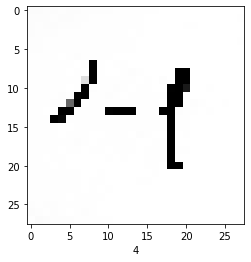

In [56]:
gde = len(imagenes_full)
plt.imshow(imagenes_full[139], cmap='gray')
print(gde)
plt.xlabel(etiquetas_full[139])

In [57]:
y = np.array(etiquetas_full)
X = np.array(imagenes_full, dtype=np.uint8)

In [58]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (232, 28, 28) (232,)
Testing data shape :  (58, 28, 28) (58,)


In [59]:
train_X = train_X / 255.
test_X = test_X / 255.

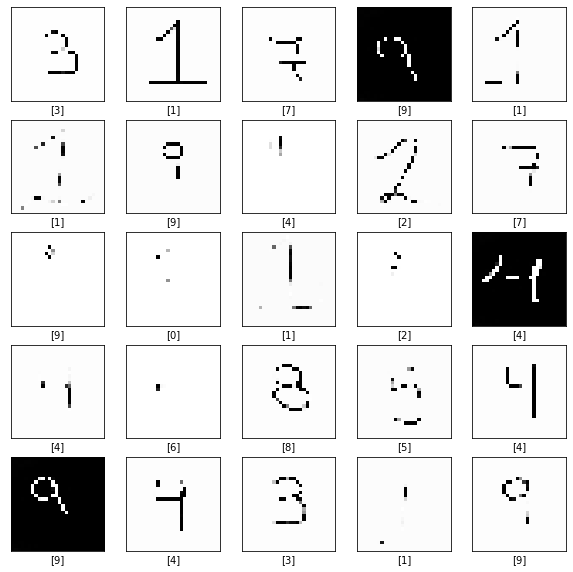

In [60]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel([train_Y[i]])
plt.show()

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
history = model.fit(train_X, train_Y, epochs=10, validation_data=(test_X, test_Y))

Epoch 1/10
8/8 [==============================] - 1s 34ms/step - loss: 2.5116 - accuracy: 0.1034 - val_loss: 2.3120 - val_accuracy: 0.1379
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 2.3217 - accuracy: 0.1983 - val_loss: 2.3010 - val_accuracy: 0.1552
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 2.2401 - accuracy: 0.3060 - val_loss: 2.2421 - val_accuracy: 0.1897
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 2.1244 - accuracy: 0.3750 - val_loss: 2.1969 - val_accuracy: 0.2759
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 2.0831 - accuracy: 0.4483 - val_loss: 2.1951 - val_accuracy: 0.2414
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 1.9902 - accuracy: 0.5216 - val_loss: 2.1500 - val_accuracy: 0.3103
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 1.9451 - accuracy: 0.5043 - val_loss: 2.1259 - val_accuracy: 0.2931
Epoch 8/10
8/8 [=================

In [64]:
test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 2.0602 - accuracy: 0.3448 - 25ms/epoch - 12ms/step

Test accuracy: 0.3448275923728943


2/2 - 0s - loss: 2.0602 - accuracy: 0.3448 - 22ms/epoch - 11ms/step


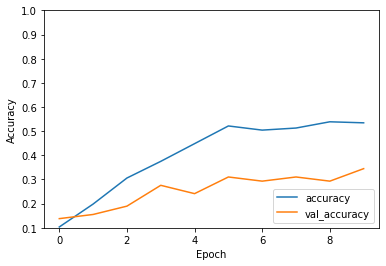

In [65]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

In [66]:
predictions = model.predict(test_X)

2/2 [==============================] - 0s 6ms/step


# ***`Primera Prediccion`***

In [67]:
predictions[5]

array([0.13340887, 0.10770469, 0.12903695, 0.09973809, 0.09453513,
       0.04038964, 0.10522544, 0.08930537, 0.10738867, 0.09326717],
      dtype=float32)

In [68]:
np.argmax(predictions[5])

0

In [69]:
test_Y[5]

0

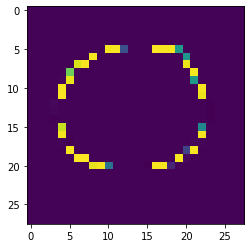

In [70]:
plt.imshow(test_X[5])


# ***`Segunda Prediccion`***

In [71]:
predictions[10]

array([0.10097344, 0.12037939, 0.10446435, 0.10103304, 0.10332837,
       0.08483826, 0.09189282, 0.0975804 , 0.0986046 , 0.0969053 ],
      dtype=float32)

In [72]:
np.argmax(predictions[10])

1

In [73]:
test_Y[10]

6

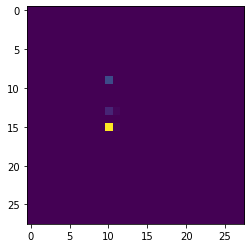

In [74]:
plt.imshow(test_X[10])

# ***`Tercera Prediccion`***

In [76]:
predictions[30]

array([0.08052251, 0.11936044, 0.09564593, 0.08562158, 0.11232971,
       0.06515859, 0.09933548, 0.11238795, 0.11432259, 0.11531521],
      dtype=float32)

In [78]:
np.argmax(predictions[30])

1

In [80]:
test_Y[30]

6

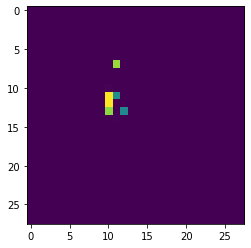

In [81]:
plt.imshow(test_X[30])